In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [2]:
# Cargar datasets
animales = pd.read_csv("animales_eeg.csv")
alimentos = pd.read_csv("alimentos_eeg.csv")
herramientas = pd.read_csv("herramientas_eeg.csv")

In [18]:
# Matrices de conectividad - correlación --> no se puede coherencia espectral, son estímulos determinados
eeg_animales = animales.loc[:, 'Fp1':]
eeg_alimentos = alimentos.loc[:, 'Fp1':]
eeg_herramientas = herramientas.loc[:, 'Fp1':]

corr_animales = eeg_animales.corr()
corr_alimentos = eeg_alimentos.corr()
corr_herramientas = eeg_herramientas.corr()

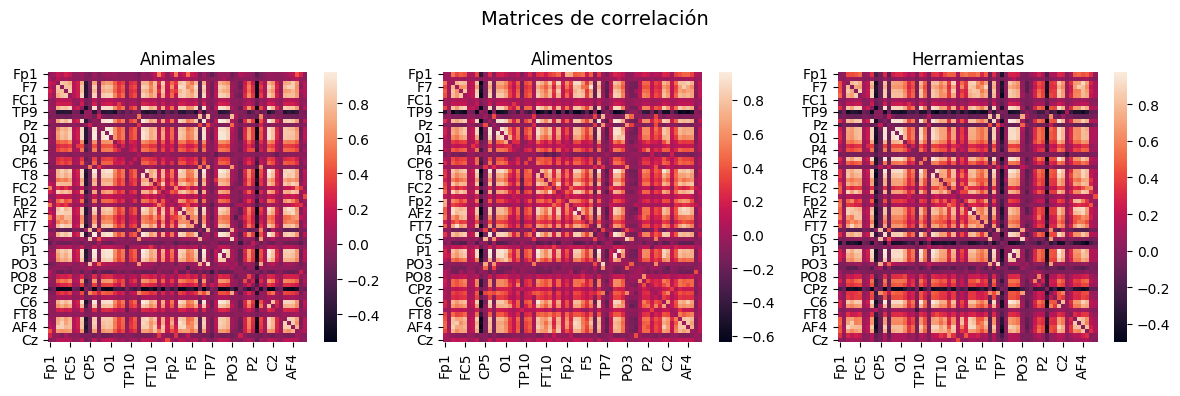

In [4]:
# Comparativa matrices de conectividad - hecha con correlación

np.fill_diagonal(corr_animales.values, 0)
np.fill_diagonal(corr_alimentos.values, 0)
np.fill_diagonal(corr_herramientas.values, 0)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(corr_animales, ax=axes[0])
axes[0].set_title("Animales")

sns.heatmap(corr_alimentos, ax=axes[1])
axes[1].set_title("Alimentos")

sns.heatmap(corr_herramientas, ax=axes[2])
axes[2].set_title("Herramientas")

fig.suptitle("Matrices de correlación", fontsize=14)
plt.tight_layout()
plt.show()

## Generación de estadísticos

AttributeError: 'str' object has no attribute 'stack'

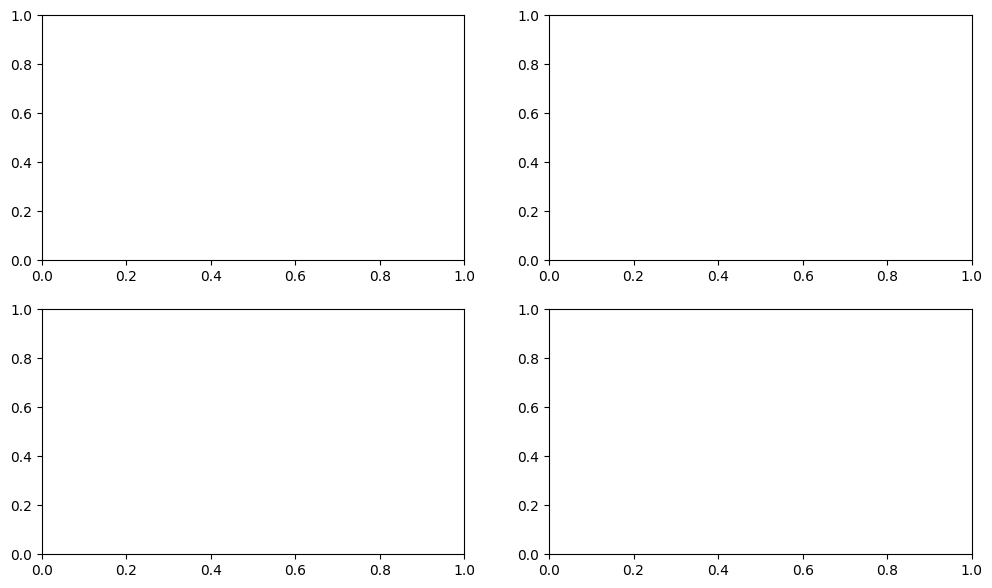

In [20]:
# Análisis animales
categoria = animales

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2,2, figsize=(12,7))


for subject in categoria:
    # cálculo estadísticos
    data = subject.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))

    # plots
    sns.histplot(subject.stack().values, ax=axes[0][0], kde=True)  # kde=True --> para mostrar la distribución suavizada
    sns.ecdfplot(subject.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(th75, label="Percentil al 75%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()

In [19]:
animales

,subject,stimname,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,...,C6,C2,FC4,FT8,F6,AF8,AF4,F2,FCz,Cz
0,sub-01,alpaca_01b.jpg,-0.000165,-0.000019,-0.000026,-0.000057,0.000001,-6.240000e-06,4.446332e-06,1.204410e-05,...,1.675366e-05,0.000019,0.000007,2.358788e-06,-0.000023,-1.074780e-04,-0.000067,-0.000013,6.088928e-06,0.000018
1,sub-01,alpaca_02s.jpg,-0.000113,-0.000015,-0.000014,-0.000019,0.000009,4.574447e-06,-1.310000e-06,3.014836e-06,...,2.093468e-05,0.000005,0.000003,1.196936e-05,-0.000007,-5.990000e-05,-0.000042,-0.000015,7.360622e-06,0.000012
2,sub-01,alpaca_03s.jpg,-0.000085,0.000004,-0.000040,-0.000097,-0.000055,-3.300000e-05,2.664833e-06,-5.990000e-06,...,1.779714e-05,0.000009,0.000023,5.532819e-05,0.000048,5.635645e-05,0.000011,0.000013,5.610395e-06,0.000007
3,sub-01,alpaca_04s.jpg,0.000456,0.000039,0.000074,0.000111,-0.000060,-7.470000e-06,-2.940000e-06,-2.420000e-05,...,-8.510000e-05,-0.000027,-0.000027,-6.930000e-05,0.000021,2.566330e-04,0.000130,0.000028,-1.060000e-05,-0.000029
4,sub-01,cat_01b.jpg,0.000009,-0.000003,0.000012,0.000005,0.000010,4.324154e-06,-1.380000e-05,-8.110000e-06,...,3.655281e-08,-0.000010,-0.000010,1.192708e-05,0.000002,-9.350000e-07,-0.000001,-0.000008,-1.460000e-05,-0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,sub-50,owl_04s.jpg,-0.000052,-0.000003,-0.000021,-0.000040,0.000030,-8.850000e-07,-1.280000e-05,-5.660000e-07,...,1.368847e-05,0.000009,0.000016,2.649144e-05,-0.000002,-2.540000e-05,-0.000007,0.000017,-5.870000e-07,0.000006
1956,sub-50,raccoon_01b.jpg,0.000142,-0.000005,0.000024,0.000004,-0.000008,1.651581e-06,9.713889e-07,-8.620000e-06,...,-1.700000e-05,-0.000005,0.000003,-1.360000e-05,0.000026,5.204084e-05,0.000082,0.000005,-8.850000e-06,-0.000007
1957,sub-50,raccoon_02s.jpg,-0.000664,0.000030,-0.000003,-0.000064,0.000053,5.122995e-05,4.977197e-05,5.053639e-05,...,7.663416e-05,0.000064,0.000045,3.828615e-05,-0.000227,-3.409450e-04,-0.000058,0.000033,2.747629e-05,0.000054
1958,sub-50,raccoon_03s.jpg,0.000143,-0.000028,-0.000010,0.000021,0.000014,4.557222e-06,-2.330000e-05,-1.030000e-05,...,-1.370000e-06,-0.000021,-0.000008,4.680996e-06,0.000039,4.363428e-05,0.000027,-0.000019,-2.590000e-05,-0.000016
